# Introduction
A scratch notebook to try out the `job-posting-nlp` conda env.

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

## Section 1: Pandas Warmup


In [2]:
grid = [[1,2,3], [4,5,6], [7,8,9]]
print(grid[1])
# print(grid[1][0])
# res => '4'
list == type(grid)

[4, 5, 6]


True

In [3]:
# That was fun, but how about creating a dataframe?
df = pd.DataFrame(grid)
print(df)

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9


In [4]:
# Maybe annotate that little dataframe?
df = pd.DataFrame(grid, columns=["item_1", "item_2", "item_3"])
print(df)

   item_1  item_2  item_3
0       1       2       3
1       4       5       6
2       7       8       9


In [5]:
# Now you can access the column by column name!
print(df["item_3"])

0    3
1    6
2    9
Name: item_3, dtype: int64


In [6]:
# Oops! This list comprehension is actually written as a `generator object`!
print(x[0] for x in grid)

&lt;generator object &lt;genexpr&gt; at 0x7ff606df27d0&gt;


In [7]:
# Try again with grid and a list comprehension…
print([x[0] for x in grid]) # zero indexed!

[1, 4, 7]


In [8]:
# loop iterator
for x in df["item_3"]:
    print("The item_3 value is: " + str(x))

The item_3 value is: 3
The item_3 value is: 6
The item_3 value is: 9


In [9]:
# subset the dataframe (by dropping the middle)
edges = df[["item_1", "item_3"]]
print(edges)

   item_1  item_3
0       1       3
1       4       6
2       7       9


In [10]:
# test a simple method `add()` on the dataframe
print(edges.add(2))

   item_1  item_3
0       3       5
1       6       8
2       9      11


In [11]:
# note: the `add()` is not persisted…
print(edges)

   item_1  item_3
0       1       3
1       4       6
2       7       9


### Section 1.2 Work with a web-based API

In [12]:
# hmmm. the 1.2 subsection imports a JSON file that was not provided…
import requests
import json
response = requests.get("https://api.maas2.apollorion.com")
maas2_json = response.json()

In [13]:
type(maas2_json)
print(maas2_json)

dict

{&#39;status&#39;: 200, &#39;id&#39;: 2531, &#39;terrestrial_date&#39;: &#39;2020-02-06T00:00:00.000Z&#39;, &#39;ls&#39;: 146, &#39;season&#39;: &#39;Month 5&#39;, &#39;min_temp&#39;: -70, &#39;max_temp&#39;: -13, &#39;pressure&#39;: 709, &#39;pressure_string&#39;: &#39;Lower&#39;, &#39;abs_humidity&#39;: None, &#39;wind_speed&#39;: None, &#39;atmo_opacity&#39;: &#39;Sunny&#39;, &#39;sunrise&#39;: &#39;05:32&#39;, &#39;sunset&#39;: &#39;17:23&#39;, &#39;local_uv_irradiance_index&#39;: &#39;High&#39;, &#39;min_gts_temp&#39;: -71, &#39;max_gts_temp&#39;: 10, &#39;wind_direction&#39;: None, &#39;sol&#39;: 2667, &#39;unitOfMeasure&#39;: &#39;Celsius&#39;, &#39;TZ_Data&#39;: &#39;America/Port_of_Spain&#39;}


In [14]:
# the request response is a `dict` object, so lean on pandas classmethod 
# from_dict(data, orient='columns', dtype=None, columns=None)
mars = pd.DataFrame.from_dict(maas2_json, orient='index', columns=['value'])

In [15]:
print(mars)

                                              value
status                                          200
id                                             2531
terrestrial_date           2020-02-06T00:00:00.000Z
ls                                              146
season                                      Month 5
min_temp                                        -70
max_temp                                        -13
pressure                                        709
pressure_string                               Lower
abs_humidity                                   None
wind_speed                                     None
atmo_opacity                                  Sunny
sunrise                                       05:32
sunset                                        17:23
local_uv_irradiance_index                      High
min_gts_temp                                    -71
max_gts_temp                                     10
wind_direction                                 None
sol         

In [16]:
# now for csv, available from the source code for QPBE3E
temp = pd.read_csv("../data/temp_data_01.csv", na_values=['Missing']) # NB. temp is for temperature!

In [17]:
print(temp)

   Notes     State  State Code Month Day, Year Month Day, Year Code  \
0    NaN  Illinois          17    Jan 01, 1979           1979/01/01   
1    NaN  Illinois          17    Jan 02, 1979           1979/01/02   
2    NaN  Illinois          17    Jan 03, 1979           1979/01/03   
3    NaN  Illinois          17    Jan 04, 1979           1979/01/04   
4    NaN  Illinois          17    May 15, 1979           1979/05/15   
5    NaN  Illinois          17    May 16, 1979           1979/05/16   
6    NaN  Illinois          17    May 17, 1979           1979/05/17   
7    NaN  Illinois          17    May 18, 1979           1979/05/18   
8    NaN  Illinois          17    May 19, 1979           1979/05/19   

   Avg Daily Max Air Temperature (F)  Record Count for Daily Max Air Temp (F)  \
0                              17.48                                      994   
1                               4.64                                      994   
2                              11.05          

In [18]:
# transform original, really small dataframe to a JSON object
df.to_json()

&#39;{&quot;item_1&quot;:{&quot;0&quot;:1,&quot;1&quot;:4,&quot;2&quot;:7},&quot;item_2&quot;:{&quot;0&quot;:2,&quot;1&quot;:5,&quot;2&quot;:8},&quot;item_3&quot;:{&quot;0&quot;:3,&quot;1&quot;:6,&quot;2&quot;:9}}&#39;

In [19]:
# returning to the `temp` dataframe, there are parts that aren't really meaningful
temp.head(1) # NB. => | Notes | State | State Code | Month, Day, Year |

,Notes,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Record Count for Daily Max Air Temp (F),Min Temp for Daily Max Air Temp (F),Max Temp for Daily Max Air Temp (F),Avg Daily Min Air Temperature (F),Record Count for Daily Min Air Temp (F),Min Temp for Daily Min Air Temp (F),Max Temp for Daily Min Air Temp (F),Avg Daily Max Heat Index (F),Record Count for Daily Max Heat Index (F),Min for Daily Max Heat Index (F),Max for Daily Max Heat Index (F),Daily Max Heat Index (F) % Coverage
0,NaN,Illinois,17,"Jan 01, 1979",1979/01/01,17.48,994,6.0,30.5,2.89,994,-13.6,15.8,NaN,0,NaN,NaN,0.00%


In [20]:
temp = pd.read_csv("../data/temp_data_01.csv", na_values=['Missing'], header=0,
                    names=range(18), usecols=range(4,18))
temp.shape
print("---")
print(temp)

(9, 14)

---
           4      5    6     7     8      9    10    11    12     13   14  \
0  1979/01/01  17.48  994   6.0  30.5   2.89  994 -13.6  15.8    NaN    0   
1  1979/01/02   4.64  994  -6.4  15.8  -9.03  994 -23.6   6.6    NaN    0   
2  1979/01/03  11.05  994  -0.7  24.7  -2.17  994 -18.3  12.9    NaN    0   
3  1979/01/04   9.51  994   0.2  27.6  -0.43  994 -16.3  16.3    NaN    0   
4  1979/05/15  68.42  994  61.0  75.1  51.30  994  43.3  57.0    NaN    0   
5  1979/05/16  70.29  994  63.4  73.5  48.09  994  41.1  53.0    NaN    0   
6  1979/05/17  75.34  994  64.0  80.5  50.84  994  44.3  55.7  82.60    2   
7  1979/05/18  79.13  994  75.5  82.1  55.68  994  50.0  61.1  81.42  349   
8  1979/05/19  74.94  994  66.9  83.1  58.59  994  50.9  63.2  82.87   78   

     15    16      17  
0   NaN   NaN   0.00%  
1   NaN   NaN   0.00%  
2   NaN   NaN   0.00%  
3   NaN   NaN   0.00%  
4   NaN   NaN   0.00%  
5   NaN   NaN   0.00%  
6  82.4  82.8   0.20%  
7  80.2  83.4  35.11%  
8  81.6  

In [21]:
# per the liveProject, the "Daily Max Heat Index (F) %" was provided as a formatted string
temp[17].value_counts()

0.00%     6
7.85%     1
35.11%    1
0.20%     1
Name: 17, dtype: int64

In [22]:
# per the liveProject, can we "fix up" the "Daily Max Heat Index (F) %" column?
# (szf) select just 1st and last columns
# temp.iloc[:, [0, -1]] 
# (szf) ^^ meaning "all rows" `:` == [1,2,3,… 8] | first column is `0`, last column is `-1`
# ---
# combine steps and rename cols
new_temp = temp.iloc[:, [0, -1]].rename(columns = {4:'date_yymd', 17:'dmx_hidx'})
print(new_temp.columns)
print("---")
print(new_temp)

Index([&#39;date_yymd&#39;, &#39;dmx_hidx&#39;], dtype=&#39;object&#39;)
---
    date_yymd dmx_hidx
0  1979/01/01    0.00%
1  1979/01/02    0.00%
2  1979/01/03    0.00%
3  1979/01/04    0.00%
4  1979/05/15    0.00%
5  1979/05/16    0.00%
6  1979/05/17    0.20%
7  1979/05/18   35.11%
8  1979/05/19    7.85%


In [23]:
# fractionalize column 'dmx_hidx'
new_temp['dmx_hidx'] = new_temp['dmx_hidx'].str.strip("%").astype(float).div(100)

In [24]:
print(new_temp)

    date_yymd  dmx_hidx
0  1979/01/01    0.0000
1  1979/01/02    0.0000
2  1979/01/03    0.0000
3  1979/01/04    0.0000
4  1979/05/15    0.0000
5  1979/05/16    0.0000
6  1979/05/17    0.0020
7  1979/05/18    0.3511
8  1979/05/19    0.0785


## Section 2: Practice merging and aggregating datasets

In [25]:
calls = pd.read_csv("../data/sales_calls.csv") # header => | Team member | Territory | Month | Calls |
revenue = pd.read_csv("../data/sales_revenue.csv") # header => | Territory | Month | Amount |
calls_revenue = pd.merge(calls, revenue, on=['Territory', 'Month'])
# calls_revenue.info()
###
# per the liveProject, create a new column for a new metric
calls_revenue['Call Amount'] = calls_revenue.Amount / calls_revenue.Calls
print("The dataframe shape is now (" + str(calls_revenue.shape[0]) + ',' + str(calls_revenue.shape[1]) + ')')
###
print("---")
# now query the dataframe for calls that equals or exceeds the median revenue in the dataset
print(calls_revenue[calls_revenue['Call Amount'] > calls_revenue['Call Amount'].median()])

The dataframe shape is now (12,6)
---
  Team member  Territory  Month  Calls  Amount  Call Amount
0       Jorge          3      1    107   50876   475.476636
1       Jorge          3      2     88   57682   655.477273
2       Jorge          3      3     84   53689   639.154762
4         Ana          1      1     91   54228   595.912088
5         Ana          1      2    129   61640   477.829457
9         Ali          2      2     85   44957   528.905882


In [26]:
print(calls_revenue['Call Amount'])
print("---")
print("The median separates the higher half of a (sample | population| probability distribution), from the lower half.")
calls_revenue['Call Amount'].median()
print("---")
print("The mean is the arithmetic average of a set of numbers or distribute. It performs well for normal distributions.")
calls_revenue['Call Amount'].mean()

0     475.476636
1     655.477273
2     639.154762
3     435.159292
4     595.912088
5     477.829457
6     453.031250
7     407.601562
8     300.508333
9     528.905882
10    402.965517
11    389.137931
Name: Call Amount, dtype: float64
---
The median separates the higher half of a (sample | population| probability distribution), from the lower half.


464.2539427570093

---
The mean is the arithmetic average of a set of numbers or distribute. It performs well for normal distributions.


480.0966653266681

In [27]:
calls_revenue[['Month', 'Team member', 'Amount', 'Calls', 'Call Amount']]\
        .sort_values(by=['Month','Amount'], ascending = True)

,Month,Team member,Amount,Calls,Call Amount
8,1,Ali,36061,120,300.508333
0,1,Jorge,50876,107,475.476636
4,1,Ana,54228,91,595.912088
9,2,Ali,44957,85,528.905882
1,2,Jorge,57682,88,655.477273
5,2,Ana,61640,129,477.829457
10,3,Ali,35058,87,402.965517
6,3,Ana,43491,96,453.031250
2,3,Jorge,53689,84,639.154762
11,4,Ali,33855,87,389.137931


_(szf) Is it possible to group by Month (asc) and Amount (desc)?_

In [28]:
%matplotlib inline

&lt;AxesSubplot:xlabel=&#39;Territory&#39;&gt;

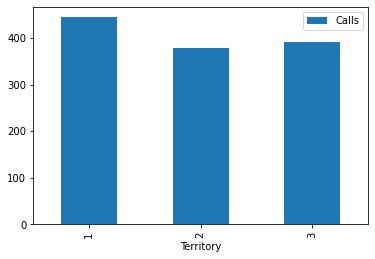

In [29]:
calls_revenue[['Territory', 'Calls']].groupby(['Territory']).sum().plot.bar()

&lt;AxesSubplot:xlabel=&#39;Month&#39;&gt;

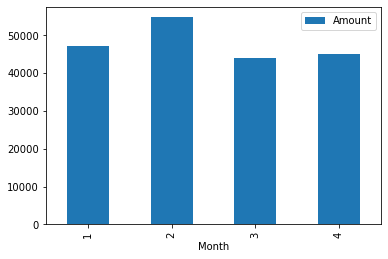

In [30]:
# (szf) request to plot the *average* Amount generated by Month
calls_revenue[['Month', 'Amount']].groupby(['Month']).mean().plot.bar()